In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [206]:
ev = pd.read_excel('EV population.xlsx')
ev.head()

,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXN60P,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,1C4JJXN60P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,1C4JJXN60P,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1C4JJXN60P,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1C4JJXN60P,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Data cleaning and Processing

In [207]:
ev_copy = ev.copy()  # Creating a copy of the original data

In [208]:
ev.columns

Index(['VIN ', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
       'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [209]:
ev.shape

(177866, 17)

In [210]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN                                                177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [211]:
ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [212]:
ev['Legislative District'] = pd.to_numeric(ev['Legislative District'], errors='coerce')

In [213]:
ev.isnull().sum()

VIN                                                    0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [214]:
print(ev['County'].value_counts())
print("\n",ev['Make'].value_counts())
print("\n",ev['County'].value_counts())
print("\n",ev['Model'].value_counts())

County
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Currituck        1
Laramie          1
Boulder          1
Bartow           1
Hardin           1
Name: count, Length: 196, dtype: int64

 Make
TESLA                   79659
NISSAN                  13998
CHEVROLET               13678
FORD                     9199
BMW                      7570
KIA                      7432
TOYOTA                   6288
VOLKSWAGEN               5004
JEEP                     4480
HYUNDAI                  4406
RIVIAN                   4312
VOLVO                    4133
AUDI                     3646
CHRYSLER                 2993
MERCEDES-BENZ            1589
PORSCHE                  1139
MITSUBISHI                958
MINI                      898
POLESTAR                  882
HONDA                     833
SUBARU                    831
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC          

In [215]:
category_val = []
continuous_val = []

for i in ev.columns:
    if ev[i].dtype == 'object':
        category_val.append(i)
    else:
        continuous_val.append(i)

print("Categorical values: ", category_val, "\nContinuous values: ", continuous_val )

Categorical values:  ['VIN ', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility'] 
Continuous values:  ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [216]:
#Handling Null Values

ev.isnull().sum()   

VIN                                                    0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [217]:
# Fill missing values
#numerical - fill mean values
#Categorical - Fill mode values

for i in ev.columns:
    if ev[i].dtype == 'object':
        modal_val = ev[i].mode()[0]
        ev[i] = ev[i].fillna(modal_val)
    else:
        mean_val = ev[i].mean()
        ev[i] = ev[i].fillna(mean_val)

In [218]:
ev.isnull().sum()

VIN                                                  0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [219]:
ev = ev.sort_index(axis=1, ascending=True   )

In [220]:
ev = ev.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV Eligibility'})
ev.head()

,2020 Census Tract,Base MSRP,City,CAFV Eligibility,County,DOL Vehicle ID,Electric Range,Electric Utility,Electric Vehicle Type,Legislative District,Make,Model,Model Year,Postal Code,State,VIN,Vehicle Location
0,5.303301e+10,0,Seattle,Clean Alternative Fuel Vehicle Eligible,King,125701579,291,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),37.0,TESLA,MODEL Y,2020,98122.0,WA,1C4JJXN60P,POINT (-122.30839 47.610365)
1,5.306105e+10,0,Bothell,Eligibility unknown as battery range has not b...,Snohomish,244285107,0,PUGET SOUND ENERGY INC,Battery Electric Vehicle (BEV),1.0,TESLA,MODEL Y,2023,98021.0,WA,1C4JJXN60P,POINT (-122.179458 47.802589)
2,5.303301e+10,0,Seattle,Clean Alternative Fuel Vehicle Eligible,King,156773144,270,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),36.0,TESLA,MODEL S,2019,98109.0,WA,1C4JJXN60P,POINT (-122.34848 47.632405)
3,5.303303e+10,0,Issaquah,Clean Alternative Fuel Vehicle Eligible,King,165103011,210,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),5.0,TESLA,MODEL S,2016,98027.0,WA,1C4JJXN60P,POINT (-122.03646 47.534065)
4,5.303594e+10,0,Suquamish,Eligibility unknown as battery range has not b...,Kitsap,205138552,0,PUGET SOUND ENERGY INC,Battery Electric Vehicle (BEV),23.0,TESLA,MODEL Y,2021,98392.0,WA,1C4JJXN60P,POINT (-122.55717 47.733415)


In [221]:
ev

,2020 Census Tract,Base MSRP,City,CAFV Eligibility,County,DOL Vehicle ID,Electric Range,Electric Utility,Electric Vehicle Type,Legislative District,Make,Model,Model Year,Postal Code,State,VIN,Vehicle Location
0,5.303301e+10,0,Seattle,Clean Alternative Fuel Vehicle Eligible,King,125701579,291,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),37.0,TESLA,MODEL Y,2020,98122.0,WA,1C4JJXN60P,POINT (-122.30839 47.610365)
1,5.306105e+10,0,Bothell,Eligibility unknown as battery range has not b...,Snohomish,244285107,0,PUGET SOUND ENERGY INC,Battery Electric Vehicle (BEV),1.0,TESLA,MODEL Y,2023,98021.0,WA,1C4JJXN60P,POINT (-122.179458 47.802589)
2,5.303301e+10,0,Seattle,Clean Alternative Fuel Vehicle Eligible,King,156773144,270,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),36.0,TESLA,MODEL S,2019,98109.0,WA,1C4JJXN60P,POINT (-122.34848 47.632405)
3,5.303303e+10,0,Issaquah,Clean Alternative Fuel Vehicle Eligible,King,165103011,210,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),5.0,TESLA,MODEL S,2016,98027.0,WA,1C4JJXN60P,POINT (-122.03646 47.534065)
4,5.303594e+10,0,Suquamish,Eligibility unknown as battery range has not b...,Kitsap,205138552,0,PUGET SOUND ENERGY INC,Battery Electric Vehicle (BEV),23.0,TESLA,MODEL Y,2021,98392.0,WA,1C4JJXN60P,POINT (-122.55717 47.733415)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,5.305307e+10,0,Bonney Lake,Eligibility unknown as battery range has not b...,Pierce,195224452,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),31.0,TESLA,MODEL Y,2022,98391.0,WA,ZASPATDW8R,POINT (-122.183805 47.18062)
177862,5.304596e+10,0,Shelton,Eligibility unknown as battery range has not b...,Mason,228454180,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Battery Electric Vehicle (BEV),35.0,HYUNDAI,KONA ELECTRIC,2023,98584.0,WA,ZASPATDW8R,POINT (-123.105305 47.211085)
177863,5.302501e+10,0,Quincy,Eligibility unknown as battery range has not b...,Grant,168797219,0,PUD NO 2 OF GRANT COUNTY,Battery Electric Vehicle (BEV),13.0,TESLA,MODEL Y,2021,98848.0,WA,ZASPATDWXR,POINT (-119.8493873 47.2339933)
177864,5.303303e+10,0,Black Diamond,Eligibility unknown as battery range has not b...,King,182448801,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Battery Electric Vehicle (BEV),5.0,VOLKSWAGEN,ID.4,2021,98010.0,WA,ZASPATDWXR,POINT (-122.00451 47.312185)


##  Descriptive Analysis

In [222]:
import statistics as sts
from scipy import stats

In [223]:
ev.describe()

,2020 Census Tract,Base MSRP,DOL Vehicle ID,Electric Range,Legislative District,Model Year,Postal Code
count,1.778660e+05,177866.000000,1.778660e+05,177866.000000,177866.000000,177866.000000,177866.000000
mean,5.297672e+10,1073.109363,2.202313e+08,58.842162,29.127481,2020.515512,98172.453506
std,1.578025e+09,8358.624956,7.584987e+07,91.981298,14.875875,2.989384,2442.416338
min,1.001020e+09,0.000000,4.385000e+03,0.000000,1.000000,1997.000000,1545.000000
25%,5.303301e+10,0.000000,1.814743e+08,0.000000,18.000000,2019.000000,98052.000000
50%,5.303303e+10,0.000000,2.282522e+08,0.000000,33.000000,2022.000000,98122.000000
75%,5.305307e+10,0.000000,2.548445e+08,75.000000,42.000000,2023.000000,98370.000000
max,5.603300e+10,845000.000000,4.792548e+08,337.000000,49.000000,2024.000000,99577.000000


In [224]:
print("Categorical values: ", category_val, "\nContinuous values: ", continuous_val )

Categorical values:  ['VIN ', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility'] 
Continuous values:  ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [225]:
# lets find mean, mode and median for Electric Range of  to find how data is distributed.

print("Mean of Electric range: ", sts.mean(ev['Electric Range']))
print("median of Electric range: ", sts.median(ev['Electric Range']))
print("mode of Electric range: ", sts.mode(ev['Electric Range']))
print("stdev of Electric range: ", sts.stdev(ev['Electric Range']))
print("pstdev of Electric range: ", sts.pstdev(ev['Electric Range']))
print("variance of Electric range: ", sts.variance(ev['Electric Range']))
print("min and max of Electric range: ", min(ev['Electric Range']), max(ev['Electric Range']))







Mean of Electric range:  58.842162077069254
median of Electric range:  0.0
mode of Electric range:  0
stdev of Electric range:  91.98129769418429
pstdev of Electric range:  91.981039124736
variance of Electric range:  8460.559125506152
min and max of Electric range:  0 337


Analysis of Electric Range Distribution

1. Key Findings & Executive Summary

 Dataset Composition: The dataset is predominantly composed of non-electric vehicles. This is the most critical finding, evidenced by a median and mode of 0 for the "Electric Range" variable. This indicates that over half of the entries have no electric range.

Misleading Average Value: The calculated mean electric range of 58.84 is a misleading statistic for the dataset as a whole. It is artificially inflated by a small number of high-range electric vehicles and does not represent a typical vehicle in this dataset.

High Data Variability: The data exhibits extreme variability, with electric ranges spanning from 0 to 337. The high standard deviation (91.98), which exceeds the mean, confirms that the values are widely dispersed and not clustered around a central point.

2. Detailed Statistical Observations

Measures of Central Tendency:

A Median of 0 reveals that the 50th percentile of the dataset has an electric range of zero.
A Mode of 0 confirms that zero is the most frequently occurring value.
The Mean of 58.84 is significantly skewed by the presence of outliers with high electric range values.

Distribution Shape:

The large discrepancy between the mean and the median is a classic indicator of a heavily right-skewed (or positively skewed) distribution.
This skewness implies that while the majority of data points are concentrated at the low end (0), there is a long "tail" of data points extending towards the high end of the range.

3. Recommendations for Further Analysis

Data Segmentation: It is strongly recommended to segment the dataset into at least two distinct groups for any further analysis:

Group 1: Non-Electric Vehicles (Electric Range = 0)

Group 2: Electric & Hybrid Vehicles (Electric Range > 0)

Appropriate Metrics: Avoid using the overall mean in reporting. Instead:
Report the median when describing the dataset as a whole.
Calculate and compare the descriptive statistics (mean, median, standard deviation) for the segmented groups separately to derive meaningful insights.
Investigate the EV/PHEV Segment: Once segmented, a deeper analysis of the "Electric & Hybrid" group should be performed to understand the distribution, typical range, and variability within just that population.


In [226]:
#removing values from dataset where  electric range is 0
ev_zeroRemoved = ev[ev['Electric Range'] != 0]   
ev_zeroRemoved.shape

(85916, 17)

In [227]:
t_stats_MSRP_Electric_Range, p_stats_MSRP_Electric_Range = stats.ttest_ind(ev_zeroRemoved['Base MSRP'], ev_zeroRemoved['Electric Range'])
print("T-test: ", t_stats_MSRP_Electric_Range, "\nP-test: ", p_stats_MSRP_Electric_Range)

T-test:  51.631212601426576 
P-test:  0.0


In [228]:
# lets find mean, mode and median for Electric Range of  to find how data is distributed.

print("Mean of Electric range: ", sts.mean(ev_zeroRemoved['Electric Range']))
print("median of Electric range: ", sts.median(ev_zeroRemoved['Electric Range']))
print("mode of Electric range: ", sts.mode(ev_zeroRemoved['Electric Range']))
print("stdev of Electric range: ", sts.stdev(ev_zeroRemoved['Electric Range']))
print("pstdev of Electric range: ", sts.pstdev(ev_zeroRemoved['Electric Range']))
print("variance of Electric range: ", sts.variance(ev_zeroRemoved['Electric Range']))
print("min and max of Electric range: ", min(ev_zeroRemoved['Electric Range']), max(ev_zeroRemoved['Electric Range']))







Mean of Electric range:  121.81689091670934
median of Electric range:  84.0
mode of Electric range:  215
stdev of Electric range:  99.21665936955675
pstdev of Electric range:  99.21608196285676
variance of Electric range:  9843.945496454655
min and max of Electric range:  6 337


1. Key Findings & Executive Summary

Dataset Focus: This dataset exclusively contains vehicles with electric range capabilities, with the minimum range being 12 miles. This analysis is specific to the EV and PHEV market segment.
Right-Skewed Distribution: The data is moderately skewed to the right, as indicated by the mean (121.8 miles) being greater than the median (93 miles). This suggests that while half of the vehicles have a range of 93 miles or less, a number of vehicles with significantly higher ranges are pulling the average up.
Significant Cluster at High Range: A mode of 208 miles is a key finding. It indicates that the single most common electric range in the dataset is a relatively high 208 miles. This may point to a popular vehicle model or a common battery standard that is prevalent in the market.
High Diversity in Market: The electric range is highly variable, spanning from a minimum of 12 miles to a maximum of 265 miles. The large standard deviation of 90 miles confirms that the market is not uniform; instead, it contains a wide variety of vehicles, from short-range city commuters to long-range models.
2. Detailed Statistical Observations

Measures of Central Tendency:

The Median of 93 miles represents the true midpoint of the data; 50% of the vehicles have a range less than or equal to this value.
The Mean of 121.8 miles provides the average range but should be interpreted with caution due to the distribution's skewness.
The Mode of 208 miles highlights a significant concentration of vehicles at a specific high-range point, suggesting a potential sub-group or market standard. The fact that the mode is the highest of the three central tendency measures is unusual and points to a complex, possibly multi-modal, distribution.
Variability and Spread:

The range of the data is 253 miles (265 - 12), indicating a vast difference between the lowest and highest performing vehicles.
The Standard Deviation of 90 miles is substantial, implying that individual vehicle ranges often deviate significantly from the average range.
3. Implications & Recommendations

Market Segmentation: The data suggests the existence of distinct segments within the EV/PHEV market. The gap between the median (93) and the mode (208) could represent two different consumer targets:
A general market with ranges centered around 90-120 miles.
A specific, popular segment of long-range vehicles clustered around the 208-mile mark.
Understanding the "Typical" EV: There is no single "typical" EV in this dataset. A comprehensive report should discuss the different segments. The median (93 miles) can be used to describe the 50th percentile vehicle, while the mode (208 miles) should be highlighted as a particularly successful or common configuration in the current market.

In [229]:
#removing values from dataset where  MSRP is 0
ev_MSRP = ev[ev['Base MSRP'] != 0]   
ev_MSRP.shape

(3344, 17)

In [230]:
# lets find mean, mode and median for Base MSRP of  to find how data is distributed.

print("Mean of Base MSRP: ", sts.mean(ev_MSRP['Base MSRP']))
print("median of Base MSRP: ", sts.median(ev_MSRP['Base MSRP']))
print("mode of Base MSRP: ", sts.mode(ev_MSRP['Base MSRP']))
print("stdev of Base MSRP: ", sts.stdev(ev_MSRP['Base MSRP']))
print("pstdev of Base MSRP: ", sts.pstdev(ev_MSRP['Base MSRP']))
print("variance of Base MSRP: ", sts.variance(ev_MSRP['Base MSRP']))
print("min and max of Base MSRP: ", min(ev_MSRP['Base MSRP']), max(ev_MSRP['Base MSRP']))







Mean of Base MSRP:  57078.250598086124
median of Base MSRP:  59900.0
mode of Base MSRP:  69900
stdev of Base MSRP:  22795.518131725097
pstdev of Base MSRP:  22792.109456097558
variance of Base MSRP:  519635646.8938076
min and max of Base MSRP:  31950 845000


#we will use ev Data for other overall visualizations and analysis
## Visualizations

In [231]:
ev.shape

(177866, 17)

In [232]:
ev.columns

Index(['2020 Census Tract', 'Base MSRP', 'City', 'CAFV Eligibility', 'County',
       'DOL Vehicle ID', 'Electric Range', 'Electric Utility',
       'Electric Vehicle Type', 'Legislative District', 'Make', 'Model',
       'Model Year', 'Postal Code', 'State', 'VIN ', 'Vehicle Location'],
      dtype='object')

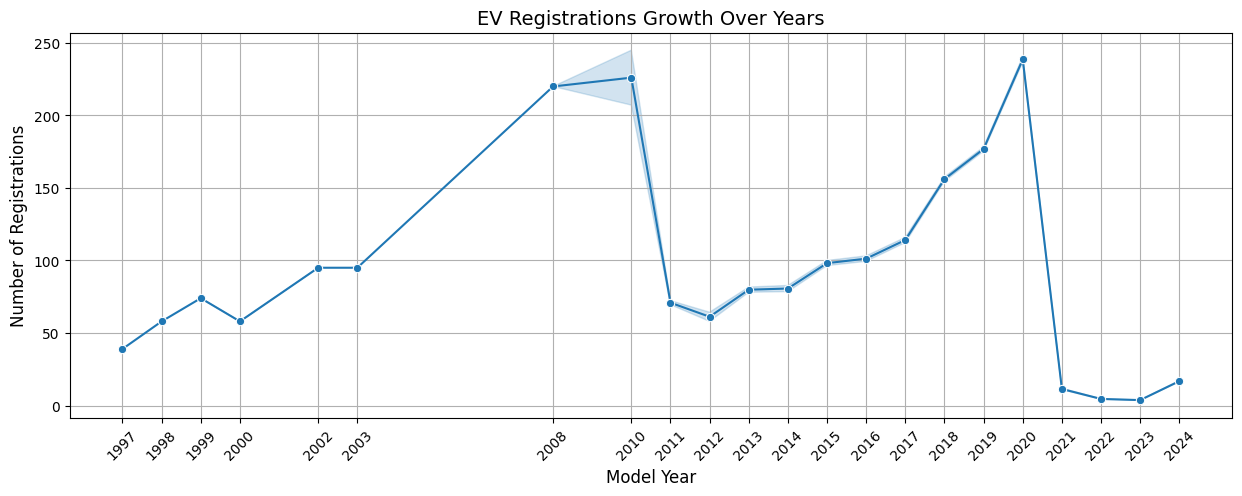

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Model Year', y='Electric Range', data=ev,marker='o')

plt.xticks(ev['Model Year'].unique(), rotation=45)  
plt.title("EV Registrations Growth Over Years", fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.grid(True)
plt.show()

In [250]:
ev['Base MSRP'].dtype

dtype('int64')

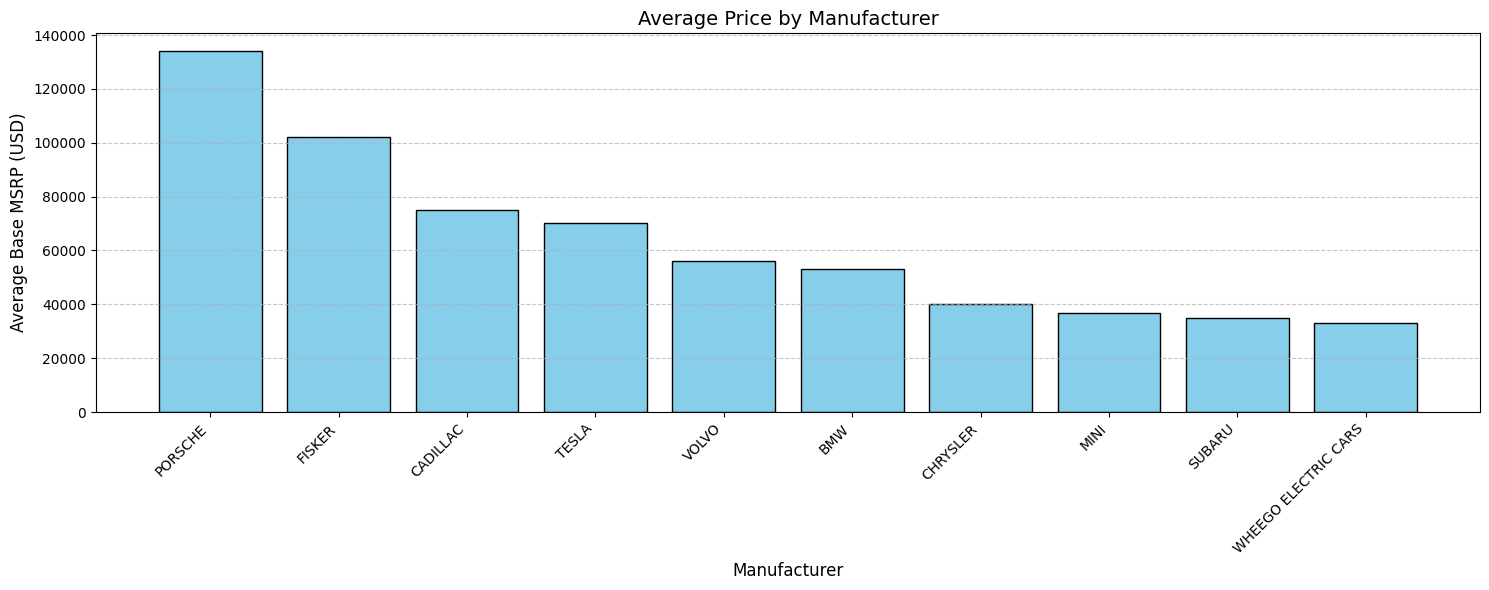

In [252]:
ev = ev[ev['Base MSRP'] > 0]

avg_price = ev.groupby('Make')['Base MSRP'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(15,6))
bars = plt.bar(avg_price.index, avg_price.values, color='skyblue', edgecolor='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Base MSRP (USD)', fontsize=12)
plt.title('Average Price by Manufacturer', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

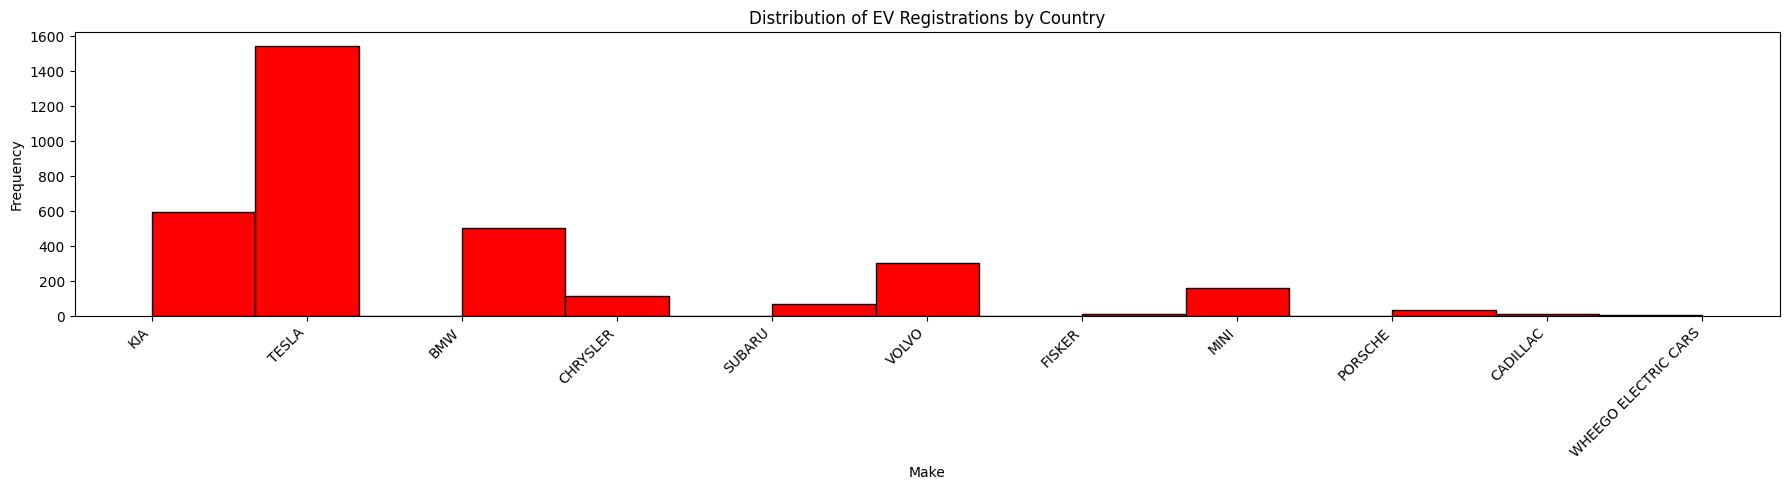

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Create histogram
plt.hist(ev['Make'], bins=15, color='red', edgecolor='black')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Distribution of EV Registrations by Country')
plt.tight_layout()
plt.show()


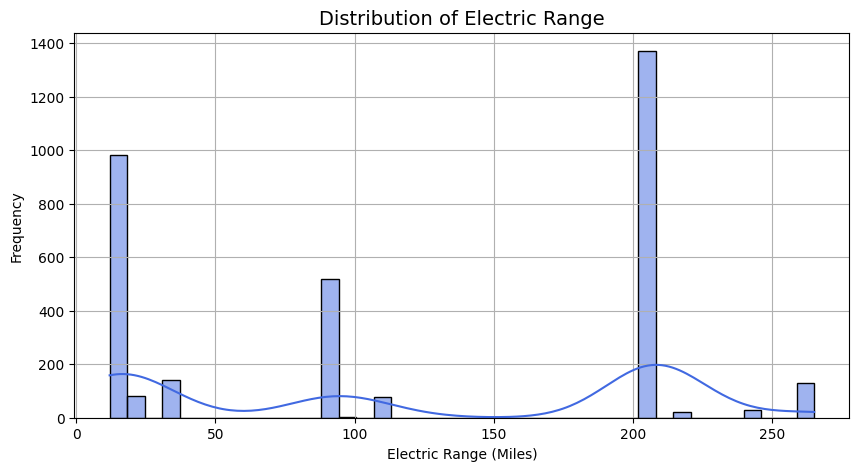

In [270]:
plt.figure(figsize=(10, 5))
sns.histplot(ev['Electric Range'], bins=40, kde=True, color='royalblue')
plt.title("Distribution of Electric Range", fontsize=14)
plt.xlabel("Electric Range (Miles)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

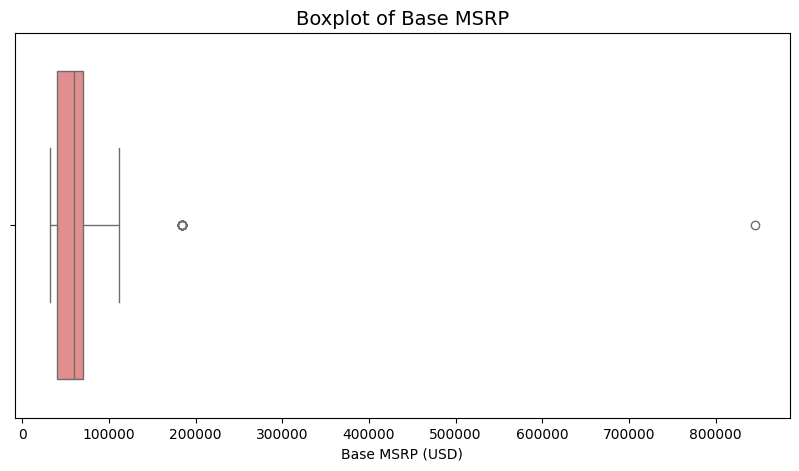

In [284]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=ev_MSRP['Base MSRP'], color='lightcoral')
plt.title("Boxplot of Base MSRP", fontsize=14)
plt.xlabel("Base MSRP (USD)")
plt.show()

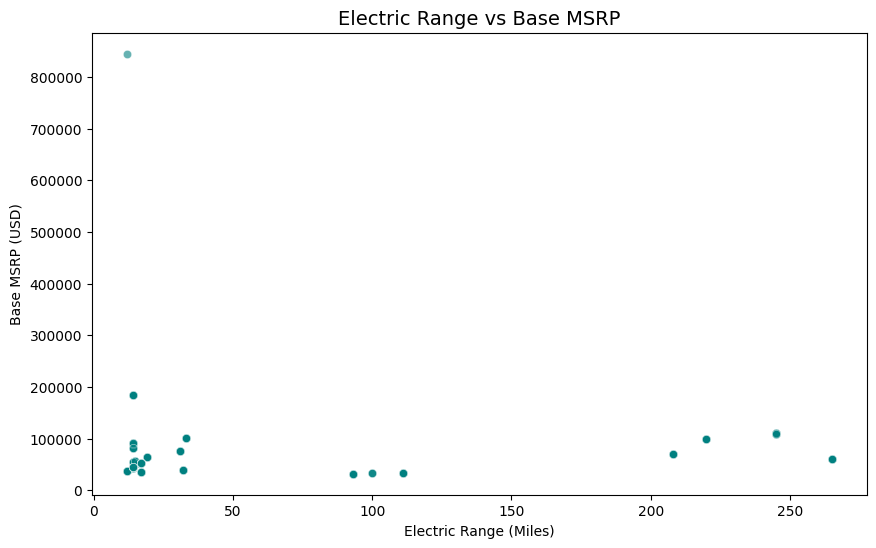

In [278]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=ev_MSRP, alpha=0.6, color='teal')
plt.title("Electric Range vs Base MSRP", fontsize=14)
plt.xlabel("Electric Range (Miles)")
plt.ylabel("Base MSRP (USD)")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7688\359157506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Make', data=ev[ev['Make'].isin(top_makes)], order=top_makes, palette='viridis')


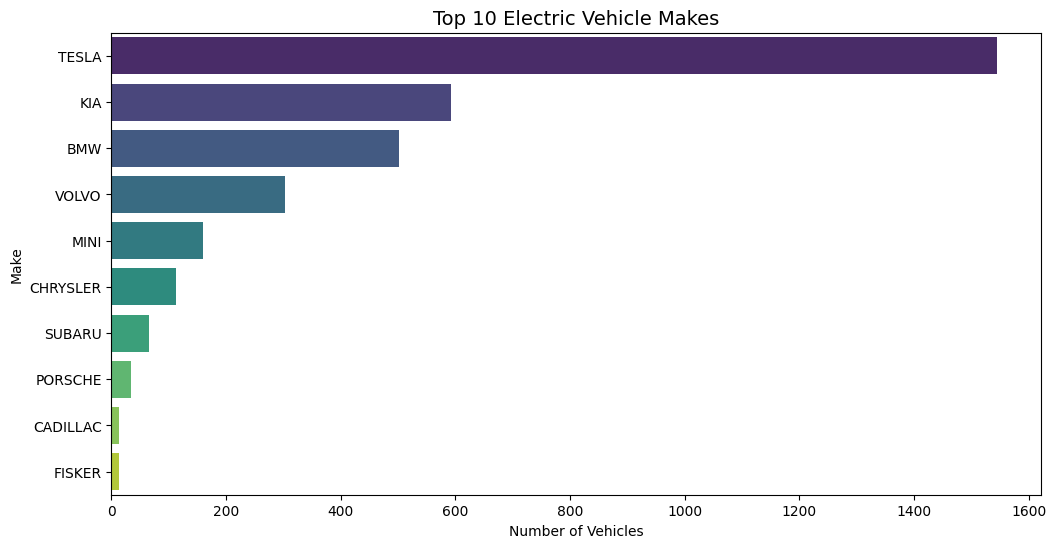

In [279]:
plt.figure(figsize=(12, 6))
top_makes = ev['Make'].value_counts().head(10).index
sns.countplot(y='Make', data=ev[ev['Make'].isin(top_makes)], order=top_makes, palette='viridis')
plt.title("Top 10 Electric Vehicle Makes", fontsize=14)
plt.xlabel("Number of Vehicles")
plt.ylabel("Make")
plt.show()

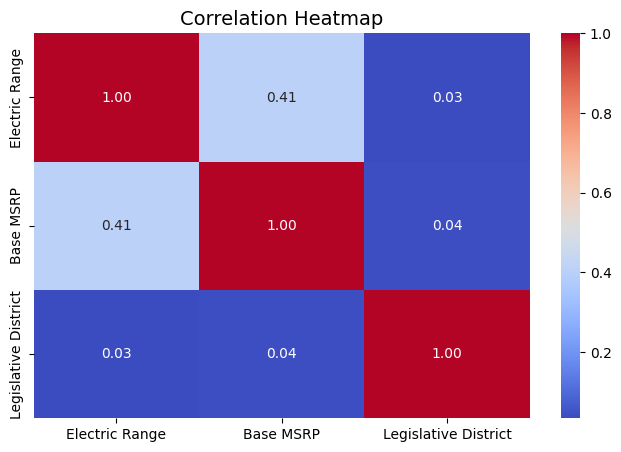

In [286]:
plt.figure(figsize=(8, 5))
corr = ev[['Electric Range', 'Base MSRP', 'Legislative District']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [285]:
ev.columns

Index(['2020 Census Tract', 'Base MSRP', 'City', 'CAFV Eligibility', 'County',
       'DOL Vehicle ID', 'Electric Range', 'Electric Utility',
       'Electric Vehicle Type', 'Legislative District', 'Make', 'Model',
       'Model Year', 'Postal Code', 'State', 'VIN ', 'Vehicle Location'],
      dtype='object')

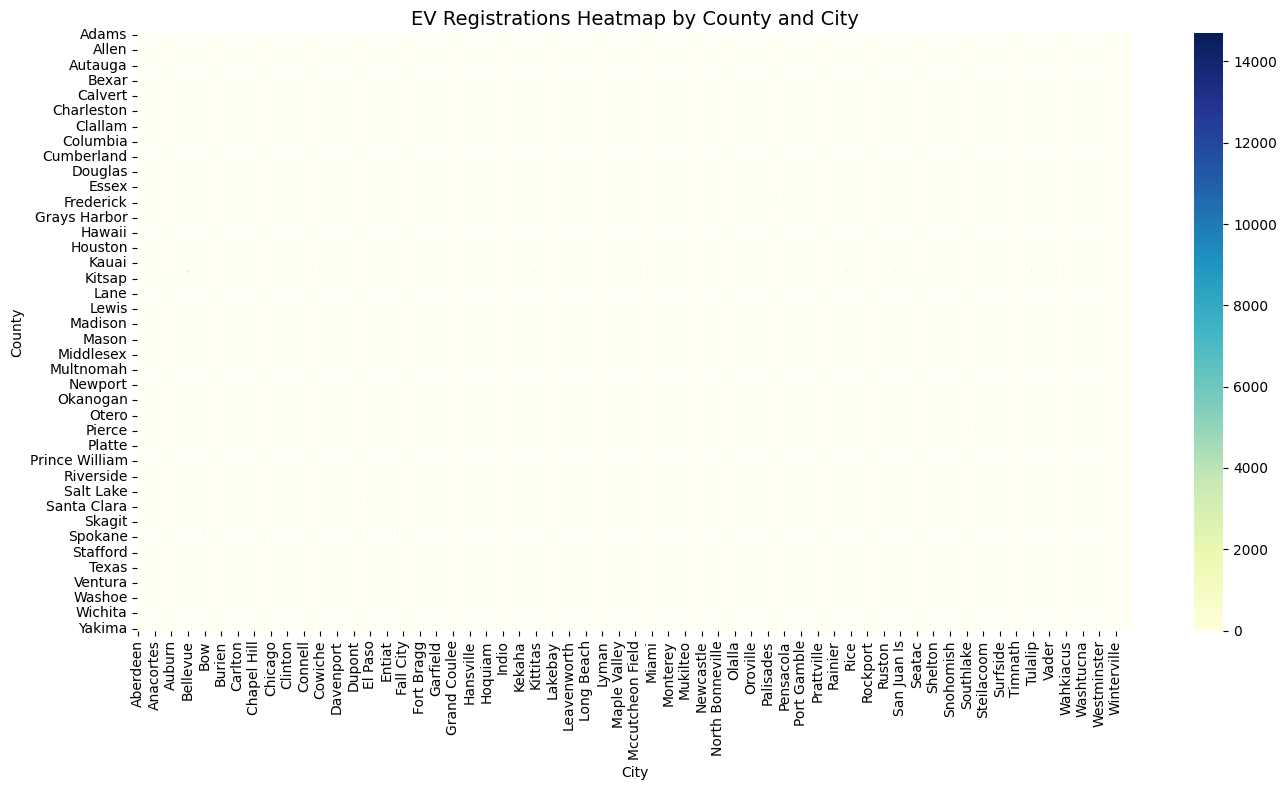

In [288]:
# -------------------------------------------------
# Geographical Analysis - EV Registrations Heatmap
# -------------------------------------------------


county_city = ev_zeroRemoved.groupby(['County', 'City']).size().reset_index(name='EV Count')

heatmap_data = county_city.pivot_table(index='County', columns='City', values='EV Count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("EV Registrations Heatmap by County and City", fontsize=14)
plt.xlabel("City")
plt.ylabel("County")
plt.tight_layout()
plt.show()


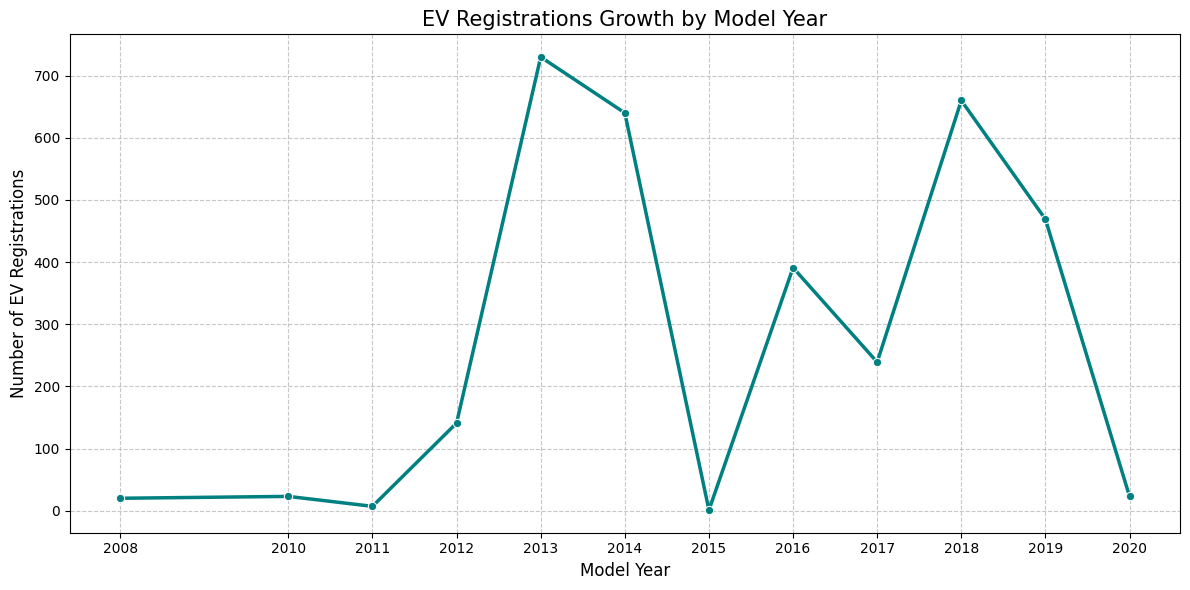

In [293]:


yearly_reg = ev.groupby('Model Year').size().reset_index(name='EV Count')

yearly_reg = yearly_reg.sort_values(by='Model Year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_reg, x='Model Year', y='EV Count', marker='o', linewidth=2.5, color='teal')

plt.title("EV Registrations Growth by Model Year", fontsize=15)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Number of EV Registrations", fontsize=12)
plt.xticks(sorted(yearly_reg['Model Year'].unique())) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


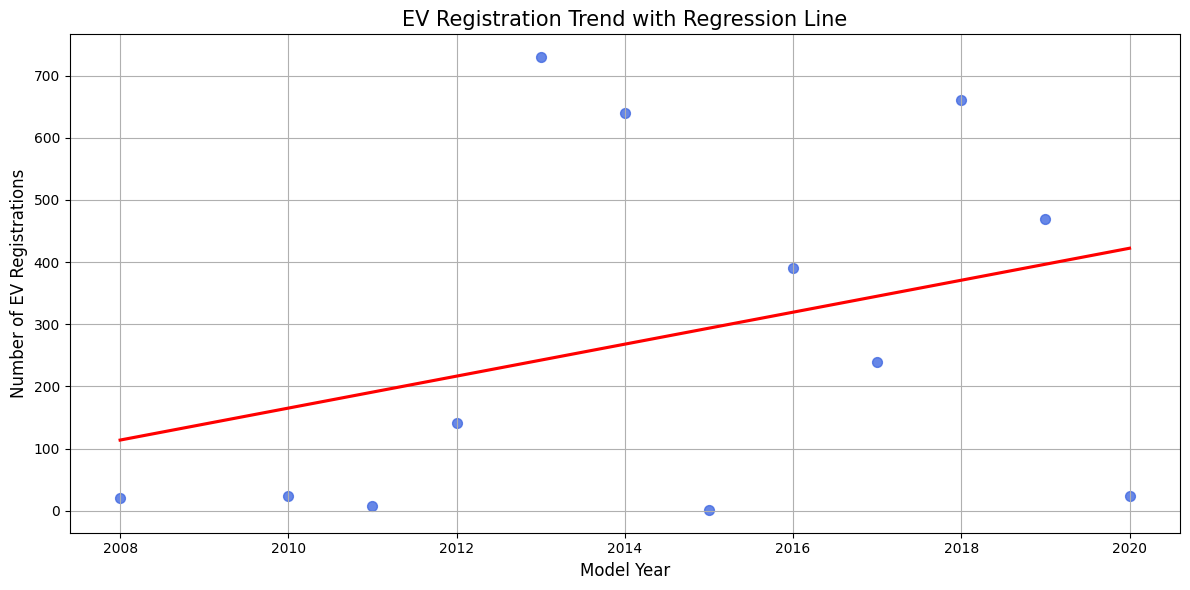

In [294]:
# Regression line (trend fit)
plt.figure(figsize=(12, 6))
sns.regplot(data=yearly_reg, x='Model Year', y='EV Count', 
            scatter_kws={'s': 50, 'color': 'royalblue'}, 
            line_kws={'color': 'red'}, ci=None)

plt.title("EV Registration Trend with Regression Line", fontsize=15)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Number of EV Registrations", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


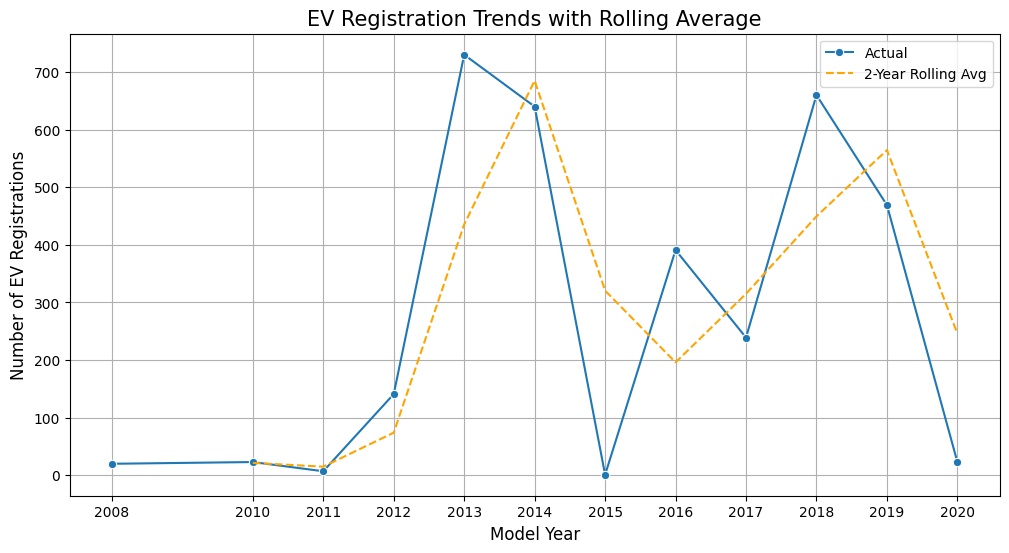

In [295]:

yearly_reg['Rolling Mean'] = yearly_reg['EV Count'].rolling(window=2).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_reg, x='Model Year', y='EV Count', label='Actual', marker='o')
sns.lineplot(data=yearly_reg, x='Model Year', y='Rolling Mean', label='2-Year Rolling Avg', linestyle='--', color='orange')

plt.title("EV Registration Trends with Rolling Average", fontsize=15)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Number of EV Registrations", fontsize=12)
plt.xticks(sorted(yearly_reg['Model Year'].unique()))
plt.legend()
plt.grid(True)
plt.show()


### Project work will be completed once all ML topics covered......................